In [102]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from scipy.interpolate import interp1d #for smooth line plots

In [35]:
train_set = pd.DataFrame.from_csv('../data/subset_train_OHE.csv')

In [89]:
bid_columns = []
for i in range(50, 101):
    for column in train_set.columns.values:
        if column.startswith('bid') and column.endswith(str(i)):
            bid_columns.append(column)

ask_columns = []
for i in range(50, 101):
    for column in train_set.columns.values:
        if column.startswith('ask') and column.endswith(str(i)):
            ask_columns.append(column)

In [90]:
bid_prices = np.array(train_set[bid_columns])
ask_prices = np.array(train_set[ask_columns])

In [91]:
for i in range(bid_prices.shape[1]):
    bid_prices[:, i] = bid_prices[:, i] - bid_prices[:, 0]
    
for i in range(ask_prices.shape[1]):
    ask_prices[:, i] = ask_prices[:, i] - ask_prices[:, 0]

bid_prices = bid_prices[:, 1:]
ask_prices = ask_prices[:, 1:]

In [92]:
import sklearn.preprocessing as process

In [93]:
bid_prices_nm = process.scale(bid_prices, axis=1)
ask_prices_nm = process.scale(ask_prices, axis=1)

In [103]:
bid_smoothers = []
ask_smoothers = []
for i in range(bid_prices_nm.shape[0]):
    bid_smoothers.append(interp1d(range(49), bid_prices_nm[i, :], kind='cubic'))
    ask_smoothers.append(interp1d(range(49), ask_prices_nm[i, :], kind='cubic'))

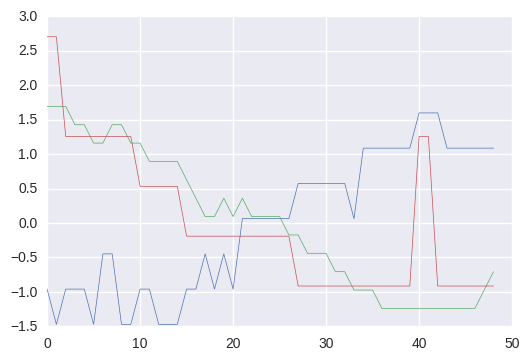

In [165]:
x_axis = range(49)
plt.plot(x_axis, bid_smoothers[1](x_axis), linewidth=0.5)
plt.plot(x_axis, bid_smoothers[8](x_axis), linewidth=0.5)
plt.plot(x_axis, bid_smoothers[39](x_axis), linewidth=0.5)

In [170]:
clusters = 2

In [171]:
bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
bid_cluster_model.fit(bid_prices_nm)
print bid_cluster_model.score(bid_prices_nm)

-2559160.25922


In [172]:
bid_labels = bid_cluster_model.predict(bid_prices_nm)

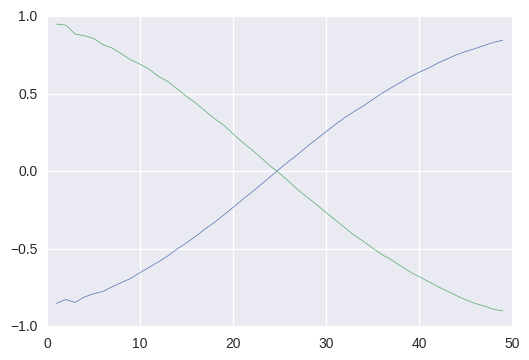

In [173]:
for i in range(clusters):
    bid_cluster = bid_prices_nm[bid_labels == i, :]
    
    bid_cluster_mean = np.mean(bid_cluster, axis=0)
    x_axis = range(1, 50)
    #print bid_cluster.shape
    plt.plot(x_axis, bid_cluster_mean, linewidth=0.5)

In [175]:
clusters = 3

In [176]:
bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
bid_cluster_model.fit(bid_prices_nm)
print bid_cluster_model.score(bid_prices_nm)

-2308864.00625


In [177]:
bid_labels = bid_cluster_model.predict(bid_prices_nm)

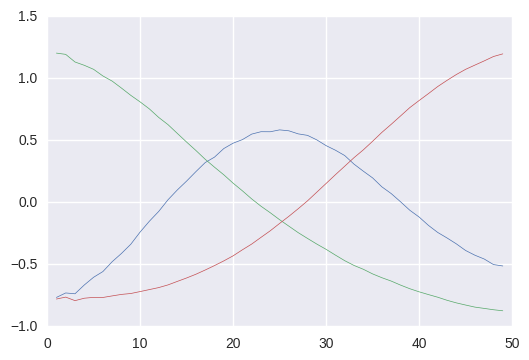

In [178]:
for i in range(clusters):
    bid_cluster = bid_prices_nm[bid_labels == i, :]
    
    bid_cluster_mean = np.mean(bid_cluster, axis=0)
    x_axis = range(1, 50)
    #print bid_cluster.shape
    plt.plot(x_axis, bid_cluster_mean, linewidth=0.5)

In [179]:
clusters = 4

In [180]:
bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
bid_cluster_model.fit(bid_prices_nm)
print bid_cluster_model.score(bid_prices_nm)

-2110097.35232


In [181]:
bid_labels = bid_cluster_model.predict(bid_prices_nm)

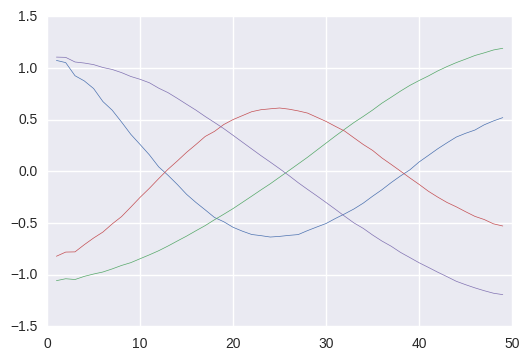

In [182]:
for i in range(clusters):
    bid_cluster = bid_prices_nm[bid_labels == i, :]
    
    bid_cluster_mean = np.mean(bid_cluster, axis=0)
    x_axis = range(1, 50)
    #print bid_cluster.shape
    plt.plot(x_axis, bid_cluster_mean, linewidth=0.5)

-2003434.12628


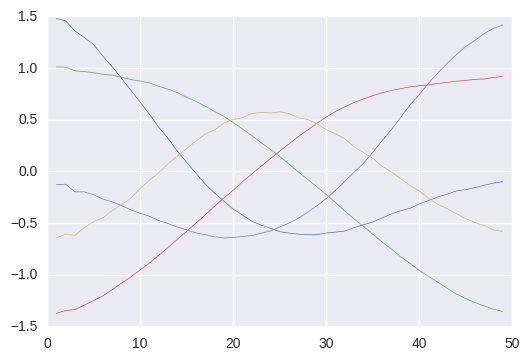

In [184]:
clusters = 5
bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
bid_cluster_model.fit(bid_prices_nm)
print bid_cluster_model.score(bid_prices_nm)

bid_labels = bid_cluster_model.predict(bid_prices_nm)

for i in range(clusters):
    bid_cluster = bid_prices_nm[bid_labels == i, :]
    
    bid_cluster_mean = np.mean(bid_cluster, axis=0)
    x_axis = range(1, 50)
    #print bid_cluster.shape
    plt.plot(x_axis, bid_cluster_mean, linewidth=0.5)

-1931695.25442


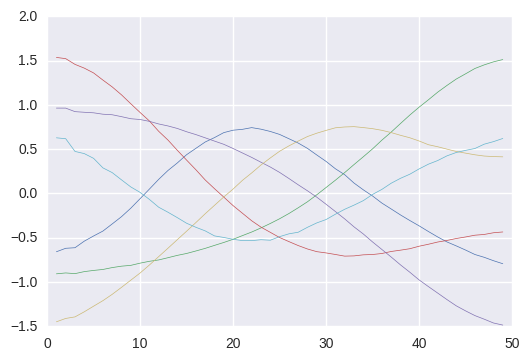

In [185]:
clusters = 6
bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
bid_cluster_model.fit(bid_prices_nm)
print bid_cluster_model.score(bid_prices_nm)

bid_labels = bid_cluster_model.predict(bid_prices_nm)

for i in range(clusters):
    bid_cluster = bid_prices_nm[bid_labels == i, :]
    
    bid_cluster_mean = np.mean(bid_cluster, axis=0)
    x_axis = range(1, 50)
    #print bid_cluster.shape
    plt.plot(x_axis, bid_cluster_mean, linewidth=0.5)

In [186]:
clusters = 5 #Final

## Clustering the whole bid-ask curve

In [187]:
all_bid_columns = []
for column in train_set.columns.values:
    if column.startswith('bid'):
        all_bid_columns.append(column)

all_ask_columns = []
for column in train_set.columns.values:
    if column.startswith('ask'):
        all_ask_columns.append(column)

In [188]:
all_bid_prices = np.array(train_set[all_bid_columns])
all_ask_prices = np.array(train_set[all_ask_columns])

In [189]:
all_bid_prices_nm = process.scale(all_bid_prices, axis=1)
all_ask_prices_nm = process.scale(all_ask_prices, axis=1)

-3846527.85955


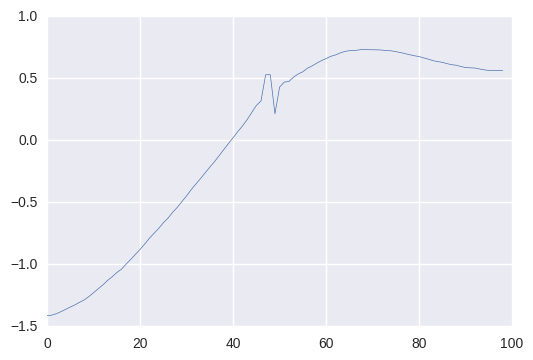

In [196]:
all_clusters = 1
all_bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
all_bid_cluster_model.fit(all_bid_prices_nm)
print all_bid_cluster_model.score(all_bid_prices_nm)

all_bid_labels = all_bid_cluster_model.predict(all_bid_prices_nm)

for i in range(all_clusters):
    all_bid_cluster = all_bid_prices_nm[all_bid_labels == i, :]
    
    all_bid_cluster_mean = np.mean(all_bid_cluster, axis=0)
    x_axis = range(99)
    #print bid_cluster.shape
    plt.plot(x_axis, all_bid_cluster_mean, linewidth=0.5)

-3846480.95462


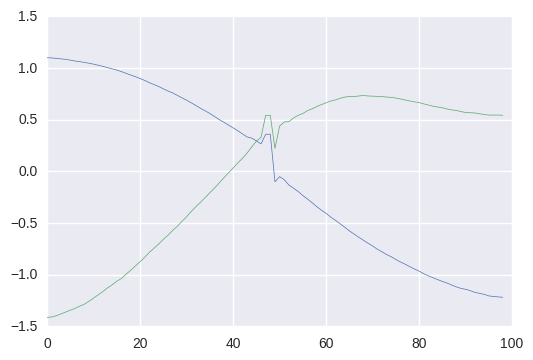

In [197]:
all_clusters = 2
all_bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
all_bid_cluster_model.fit(all_bid_prices_nm)
print all_bid_cluster_model.score(all_bid_prices_nm)

all_bid_labels = all_bid_cluster_model.predict(all_bid_prices_nm)

for i in range(all_clusters):
    all_bid_cluster = all_bid_prices_nm[all_bid_labels == i, :]
    
    all_bid_cluster_mean = np.mean(all_bid_cluster, axis=0)
    x_axis = range(99)
    #print bid_cluster.shape
    plt.plot(x_axis, all_bid_cluster_mean, linewidth=0.5)

-3846516.6423


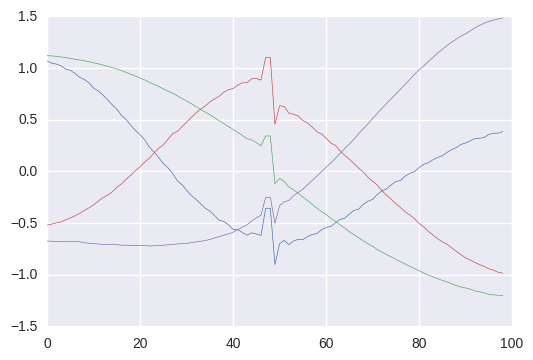

In [199]:
all_clusters = 4
all_bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
all_bid_cluster_model.fit(all_bid_prices_nm)
print all_bid_cluster_model.score(all_bid_prices_nm)

all_bid_labels = all_bid_cluster_model.predict(all_bid_prices_nm)

for i in range(all_clusters):
    all_bid_cluster = all_bid_prices_nm[all_bid_labels == i, :]
    
    all_bid_cluster_mean = np.mean(all_bid_cluster, axis=0)
    x_axis = range(99)
    #print bid_cluster.shape
    plt.plot(x_axis, all_bid_cluster_mean, linewidth=0.5)

-3846651.04489


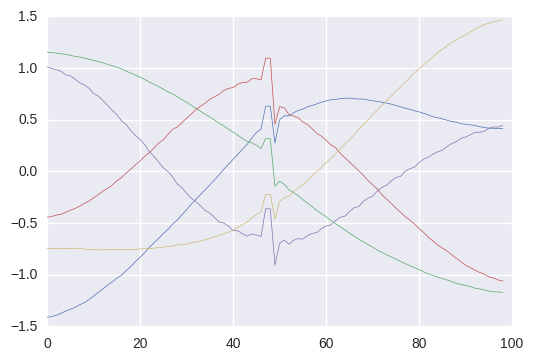

In [200]:
all_clusters = 5
all_bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
all_bid_cluster_model.fit(all_bid_prices_nm)
print all_bid_cluster_model.score(all_bid_prices_nm)

all_bid_labels = all_bid_cluster_model.predict(all_bid_prices_nm)

for i in range(all_clusters):
    all_bid_cluster = all_bid_prices_nm[all_bid_labels == i, :]
    
    all_bid_cluster_mean = np.mean(all_bid_cluster, axis=0)
    x_axis = range(99)
    #print bid_cluster.shape
    plt.plot(x_axis, all_bid_cluster_mean, linewidth=0.5)

-3846651.04489


/home/chirag/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


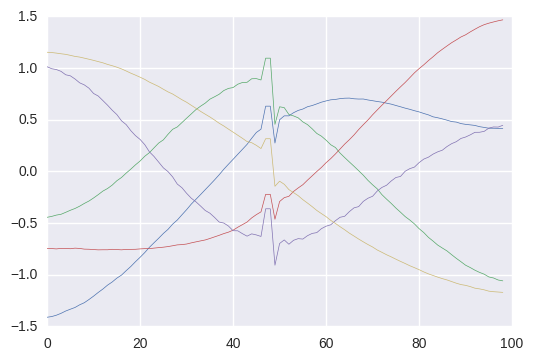

In [201]:
all_clusters = 6
all_bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
all_bid_cluster_model.fit(all_bid_prices_nm)
print all_bid_cluster_model.score(all_bid_prices_nm)

all_bid_labels = all_bid_cluster_model.predict(all_bid_prices_nm)

for i in range(all_clusters):
    all_bid_cluster = all_bid_prices_nm[all_bid_labels == i, :]
    
    all_bid_cluster_mean = np.mean(all_bid_cluster, axis=0)
    x_axis = range(99)
    #print bid_cluster.shape
    plt.plot(x_axis, all_bid_cluster_mean, linewidth=0.5)

-3845375.47679


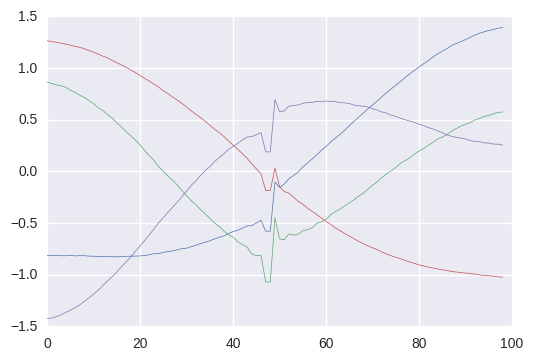

In [202]:
all_clusters = 4
all_ask_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
all_ask_cluster_model.fit(all_ask_prices_nm)
print all_ask_cluster_model.score(all_ask_prices_nm)

all_ask_labels = all_ask_cluster_model.predict(all_ask_prices_nm)

for i in range(all_clusters):
    all_ask_cluster = all_ask_prices_nm[all_ask_labels == i, :]
    
    all_ask_cluster_mean = np.mean(all_ask_cluster, axis=0)
    x_axis = range(99)
    #print bid_cluster.shape
    plt.plot(x_axis, all_ask_cluster_mean, linewidth=0.5)

## Classifying the Clusters on the basis of predictors

In [203]:
predictionColumns = []
for i in range(51, 101):
    for column in train_set.columns.values:
        if column.endswith(str(i)) and (column.startswith('ask') or column.startswith('bid')):
            predictionColumns.append(column)

In [205]:
feature_columns = []
for column in train_set.columns.values:
    if (column not in feature_columns) and (column != 'row_id') and (not column.startswith('time')):
        feature_columns.append(column)

In [213]:
trainFeatures = np.array(train_set[feature_columns])

In [207]:
all_bid_columns = []
for column in train_set.columns.values:
    if column.startswith('bid'):
        all_bid_columns.append(column)

all_ask_columns = []
for column in train_set.columns.values:
    if column.startswith('ask'):
        all_ask_columns.append(column)

In [208]:
all_bid_prices = np.array(train_set[all_bid_columns])
all_ask_prices = np.array(train_set[all_ask_columns])

In [209]:
all_bid_prices_nm = process.scale(all_bid_prices, axis=1)
all_ask_prices_nm = process.scale(all_ask_prices, axis=1)

In [210]:
all_clusters = 4
all_bid_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
all_bid_cluster_model.fit(all_bid_prices_nm)
all_bid_labels = all_bid_cluster_model.predict(all_bid_prices_nm)

all_ask_cluster_model = cluster.KMeans(n_clusters=clusters,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=300,
                                   tol=0.0001,
                                   precompute_distances='auto',
                                   verbose=0,
                                   random_state=None,
                                   copy_x=True,
                                   n_jobs=1)
all_ask_cluster_model.fit(all_ask_prices_nm)
all_ask_labels = all_ask_cluster_model.predict(all_ask_prices_nm)

In [215]:
import sklearn.ensemble as ensemble
import sklearn.multiclass as multiclass

In [ ]:
bid_cluster_classifier = multiclass.OneVsOneClassifier(estimator=ensemble.AdaBoostClassifier(base_estimator=None,
                                                     n_estimators=50,
                                                     learning_rate=1.0,
                                                     algorithm='SAMME.R',
                                                     random_state=None), n_jobs=1)
bid_cluster_classifier.fit(trainFeatures, all_bid_labels)
print "Bid accuracy: ", bid_cluster_classifier.score(trainFeatures, all_bid_labels)

ask_cluster_classifier = multiclass.OneVsOneClassifier(estimator=ensemble.AdaBoostClassifier(base_estimator=None,
                                                     n_estimators=50,
                                                     learning_rate=1.0,
                                                     algorithm='SAMME.R',
                                                     random_state=None), n_jobs=1)
ask_cluster_classifier.fit(trainFeatures, all_ask_labels)
print "Ask accuracy: ", ask_cluster_classifier.score(trainFeatures, all_ask_labels)